In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [2]:
from PIL import Image
import glob

In [3]:
PATH = "/home/jakwisn/github/Rekrutacja19/images/"

## 1. Spójrzmy na nasze obrazki

In [4]:
from PIL import Image
import glob
image_list = []
for filename in glob.glob('/home/jakwisn/github/Rekrutacja19/images/*.jpg'): #assuming gif
    im=Image.open(filename)
    image_list.append(im)


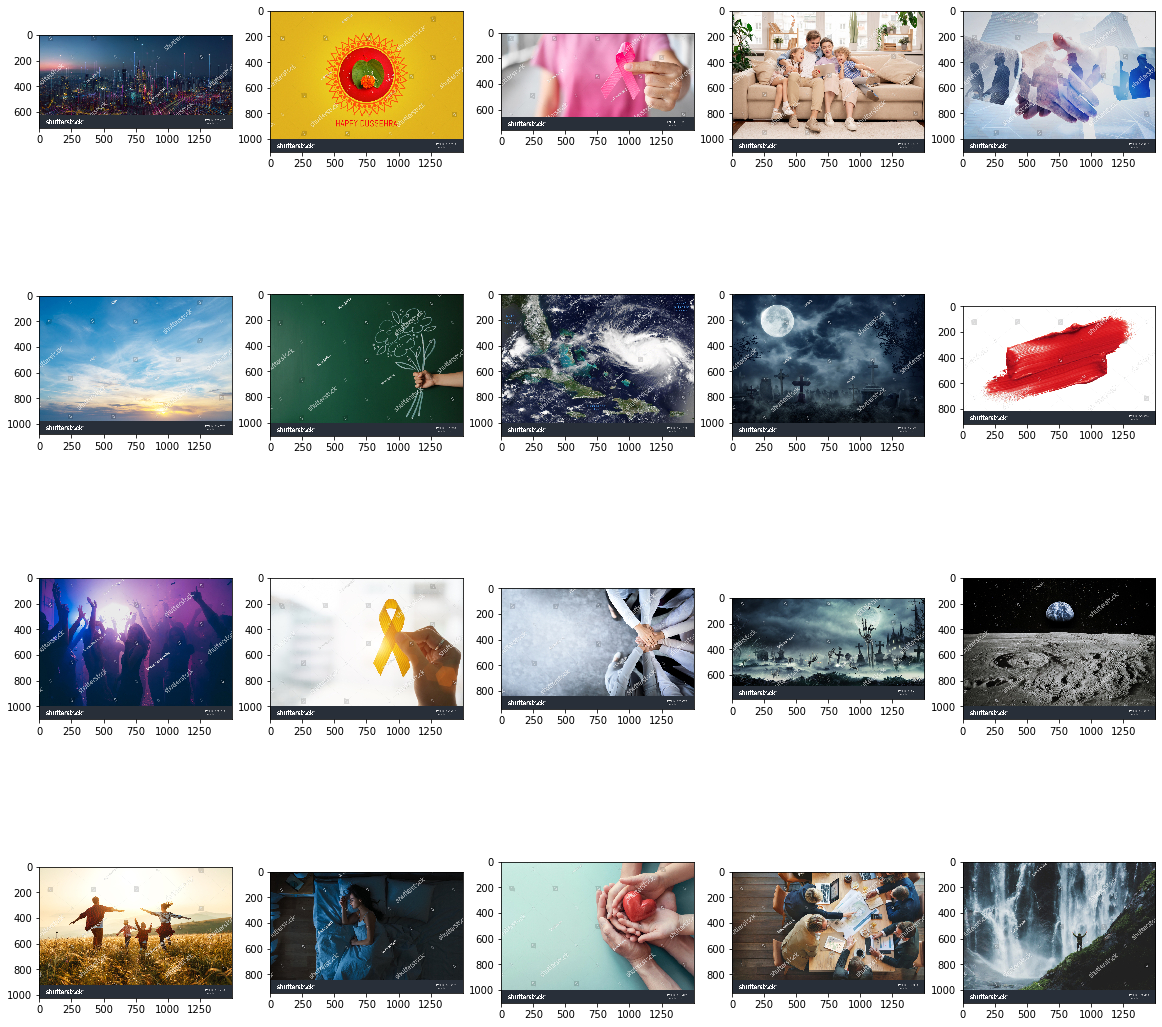

In [5]:
fig=plt.figure(figsize = (20,20))
for i in range(1, len(image_list) +1 ):
    fig.add_subplot(4, 5, i)
    plt.imshow(image_list[i -1])
plt.show()

Bardzo ładne obrazki, przygotujmy teraz funkcje, które pozwracają nam interesujące nas informacje.

## 2. Nazwy, opis i Id

In [6]:
filenames = glob.glob("/home/jakwisn/github/Rekrutacja19/images/*.jpg")

In [7]:
filenames[0]
# mamy w nazwach ścieżkę, chcemy się tego pozbyć 

'/home/jakwisn/github/Rekrutacja19/images/stock-photo-smart-city-and-abstract-dot-point-connect-with-gradient-line-and-aesthetic-intricate-wave-line-1499306735.jpg'

In [8]:
# weżmy wszystko po konkretnej długości 
po = len(PATH)
for i in range(len(filenames)) : 
    filenames[i] = filenames[i][po:]
filenames[0]

'stock-photo-smart-city-and-abstract-dot-point-connect-with-gradient-line-and-aesthetic-intricate-wave-line-1499306735.jpg'

In [9]:
def getDescriptionAndId(filenames):
    """
    input : file names vector 
    output : (description, ids) tuple
    """
    output = []
    IDs = []
    n = len(filenames)
    
    for i in range(n) :
        filename = list(filenames[i])
        
        # getting rid of "-"
        for j in range(len(filename)) : 
            if filename[j] == "-" : 
                filename[j] = " "
        
        # joining in sentances
        filename = "".join(filename)
        
        # Splitting description and ID 
        words = filename.split()
        ID = words.pop(-1)
        ID = list(ID)[:-4]
        ID = "".join(ID)
        
        filename = " ".join(words[2:])
        
        output.append(filename)
        IDs.append(ID)
    
    return output, IDs

In [10]:
descriptions, ids = getDescriptionAndId(filenames)

## 3. Szerokość i wysokość

In [11]:
def getSizes(image_list): 
    """
    input : image list
    output : (widths, heights) tuple
    """
    n = len(image_list)
    
    widths  = [0] * n 
    heights = [0] * n
    for i in range(n):
        widths[i], heights[i] = image_list[i].size
    
    
    
    return widths, heights 

In [12]:
widths, heights = getSizes(image_list)

## 4. Średni kolor

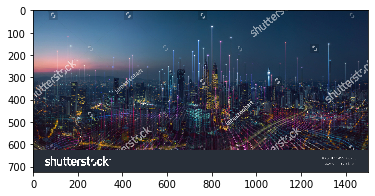

In [13]:
# znajdźmy średni kolor ręcznie w ten sposób: 
im_array = np.asarray(image_list[0])
a, b = image_list[0].size
plt.imshow(im_array.reshape(b,a,3))

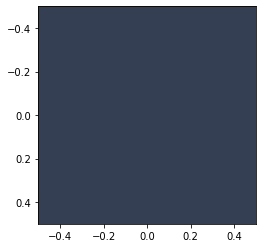

In [14]:
arr = im_array.reshape(b,a,3)
m = arr.mean(axis = 0).mean(axis = 0, dtype = int)

plt.imshow(m.reshape(1,1,3))
# na oko ma sens

In [15]:
def averageColor(image_list): 
    """
    input : image list 
    output : vector with average rgb values of the image.
             Values are floats, not integers, so before ploting, cast them to int.
    """
    
    output = []
    
    for image in image_list : 
        im_array = np.asarray(image)
        
        a,b = image.size 
        arr = im_array.reshape(b,a,3)
        m = arr.mean(axis = 0).mean(axis = 0)
        
        output.append(m)
        
    return output

In [88]:
average_color = averageColor(image_list)


## 5. Czarnobiałe - mediana, najjaśniejsze piksele

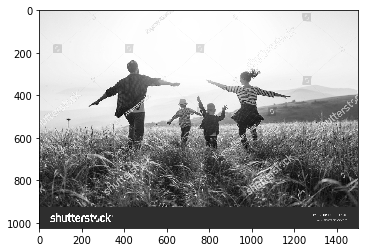

In [17]:
# w ten sposób będziemy konwertować na czarnobiałe
im = image_list[15].convert('LA')
plt.imshow(im)

In [18]:
def convToGreyScale(image_list): 
    
    
    greyImages = []
    for image in image_list : 
        greyImages.append(image.convert("LA"))
    return greyImages

In [19]:
grey_images = convToGreyScale(image_list)

In [20]:
def medianBright(grey_images): 
    """
    input : grayscale images 
    output : ndarray of medians
    """
    out = []
    
    for image in grey_images : 
        p = np.asarray(image)
        p = p[:,:,0] 
        
        out.append(np.median(p))
    
    return np.array(out)
        
    

In [21]:
median_brightness = medianBright(grey_images)

In [22]:
def findBrightest(grey_images) : 
    """
    input : grayscale list of images 
    
    output : ndarray of shape (n,2), where each row is indexes of brightest pixel closest to (0,0)
    """
    out = []
    
    for image in grey_images : 
        p = np.asarray(image)
        p = p[:,:,0]  
        ind = np.unravel_index(np.argmax(p, axis=None), p.shape)
        minimalIndexes = np.array(np.where(p == p[ind])) 
        a = minimalIndexes[0]
        b = minimalIndexes[1]

        sqrts = np.sqrt(a**2 + b**2) 

        minInd = sqrts.argmin()

        out.append(minimalIndexes[:, minInd])

    return np.array(out)

In [23]:
brightest_pixels = findBrightest(grey_images)

In [51]:
output = pd.DataFrame({'Id zdjęcia' : ids, 
                      'Nazwa pliku' : filenames,
                      'Opis': descriptions, 
                      'Szerokość' : widths, 
                      'Wysokość' : heights, 
                      'Średni kolor' : average_color, 
                      'Mediana Jasności' : median_brightness, 
                      'Pozioma wspł.' : brightest_pixels[:,1], 
                      'Pionowa wspł.' : brightest_pixels[:,0]})


In [25]:
output.to_csv('images.csv')

# Część 2

In [26]:
import os

In [27]:
os.mkdir("agg-images")

In [83]:
os.mkdir("agg-images/1-images")
os.mkdir("agg-images/2-images")
os.mkdir("agg-images/3-images")
os.mkdir("agg-images/4-images")
os.mkdir("agg-images/5-images")


In [84]:
med = np.array(output["Mediana Jasności"])
name = np.array(output["Nazwa pliku"])
med_indexes = np.argsort(med)

In [85]:
for i in range(5):
    indices = med_indexes[4*i:4*(i+1)]
    for idx in indices : 
        image = image_list[idx]
        image.save("agg-images/{}-images/{}.jpg".format(i+1, name[idx]))
